# READ TIME

In [72]:
def read_time(INPUT, MODs, C):

    STARTN = 2**23
    ENDN = 2**28
    DN = STARTN
    SEED = 9000
    SAMPLES = 10
    PATH="outputs"
    #INPUT = "normal8"
    #MOD = "power-gpu-pseudohull"
    #C=1
    import pandas as pd

    out = pd.DataFrame(columns=["size", "time", "seed"])

    for N in range(STARTN, ENDN + 1, DN):
        for k in range(1, SAMPLES + 1):
            SEED2 = SEED * k
            for MOD in MODs:
                INPUT_FILE = f"{INPUT}/{MOD}_{N+C}_{SEED2}.dat"
                print(INPUT_FILE)
                df = pd.read_csv(INPUT_FILE, sep=r'\s+', skiprows=1, names=["timestep", "power", "acc-energy", "avg-power", "dt", "acc-time"])
                if not df.empty:
                    last_row = df.iloc[-1]
                    acc_time = last_row['acc-time']
                    df_aux = pd.DataFrame({'size': [N], 'time': [acc_time], 'seed': [SEED2], 'mod': [MOD]})
                    if not df_aux.empty and df_aux.notna().all(axis=None):
                        out = pd.concat([out, df_aux], ignore_index=True)
                else:
                    print(f"Warning: {INPUT_FILE} is empty, skipping.")

    #print (out)

    sum_time_by_seed = out.groupby(['size', 'seed'])['time'].sum().reset_index()
    sum_time_by_seed = sum_time_by_seed.sort_values(by=['size', 'seed'])

    #print((sum_time_by_seed))

    avg_time_by_size = sum_time_by_seed.groupby('size')['time'].mean().reset_index()

    return avg_time_by_size


In [73]:
normal8 = read_time("normal8", ["power-gpu-pseudohull", "power-gpu-pseudohull"], 1)
normal20 = read_time("normal20", ["power-gpu-pseudohull"], 1)


normal8/power-gpu-pseudohull_8388609_9000.dat
normal8/power-gpu-pseudohull_8388609_9000.dat
normal8/power-gpu-pseudohull_8388609_18000.dat
normal8/power-gpu-pseudohull_8388609_18000.dat
normal8/power-gpu-pseudohull_8388609_27000.dat
normal8/power-gpu-pseudohull_8388609_27000.dat
normal8/power-gpu-pseudohull_8388609_36000.dat
normal8/power-gpu-pseudohull_8388609_36000.dat
normal8/power-gpu-pseudohull_8388609_45000.dat
normal8/power-gpu-pseudohull_8388609_45000.dat
normal8/power-gpu-pseudohull_8388609_54000.dat
normal8/power-gpu-pseudohull_8388609_54000.dat
normal8/power-gpu-pseudohull_8388609_63000.dat
normal8/power-gpu-pseudohull_8388609_63000.dat
normal8/power-gpu-pseudohull_8388609_72000.dat
normal8/power-gpu-pseudohull_8388609_72000.dat
normal8/power-gpu-pseudohull_8388609_81000.dat
normal8/power-gpu-pseudohull_8388609_81000.dat
normal8/power-gpu-pseudohull_8388609_90000.dat
normal8/power-gpu-pseudohull_8388609_90000.dat
normal8/power-gpu-pseudohull_16777217_9000.dat
normal8/power-g

In [74]:
normalGPU = read_time("normalGPU",["power-gpu-gpu_find_extremes_axis", "power-gpu-gpu_find_corners", "power-gpu-gpu_fill_polyhedron", "power-gpu-gpu_filter", "power-gpu-gpu_compaction"], 0)
normalRTX = read_time("normalRTX", ["power-rtx-gpu_find_extremes_axis", "power-rtx-gpu_find_corners", "power-rtx-gpu_fill_polyhedron", "power-rtx-gpu_launch_rtx", "power-rtx-gpu_compaction"], 0)

normalGPU/power-gpu-gpu_find_extremes_axis_8388608_9000.dat
normalGPU/power-gpu-gpu_find_corners_8388608_9000.dat
normalGPU/power-gpu-gpu_fill_polyhedron_8388608_9000.dat
normalGPU/power-gpu-gpu_filter_8388608_9000.dat
normalGPU/power-gpu-gpu_compaction_8388608_9000.dat
normalGPU/power-gpu-gpu_find_extremes_axis_8388608_18000.dat
normalGPU/power-gpu-gpu_find_corners_8388608_18000.dat
normalGPU/power-gpu-gpu_fill_polyhedron_8388608_18000.dat
normalGPU/power-gpu-gpu_filter_8388608_18000.dat
normalGPU/power-gpu-gpu_compaction_8388608_18000.dat
normalGPU/power-gpu-gpu_find_extremes_axis_8388608_27000.dat
normalGPU/power-gpu-gpu_find_corners_8388608_27000.dat
normalGPU/power-gpu-gpu_fill_polyhedron_8388608_27000.dat
normalGPU/power-gpu-gpu_filter_8388608_27000.dat
normalGPU/power-gpu-gpu_compaction_8388608_27000.dat
normalGPU/power-gpu-gpu_find_extremes_axis_8388608_36000.dat
normalGPU/power-gpu-gpu_find_corners_8388608_36000.dat
normalGPU/power-gpu-gpu_fill_polyhedron_8388608_36000.dat
nor

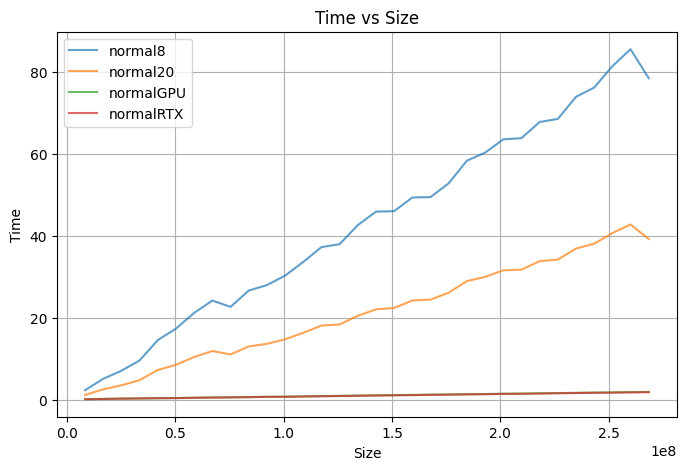

In [75]:
import matplotlib.pyplot as plt

# Convert 'size' to int if it's not already
normal8['size'] = normal8['size'].astype(int)
normal20['size'] = normal20['size'].astype(int)
normalGPU['size'] = normalGPU['size'].astype(int)
normalRTX['size'] = normalRTX['size'].astype(int)

plt.figure(figsize=(8, 5))
plt.plot(normal8['size'], normal8['time'], label='normal8', alpha=0.7)
plt.plot(normal20['size'], normal20['time'], label='normal20', alpha=0.7)
plt.plot(normalGPU['size'], normalGPU['time'], label='normalGPU', alpha=0.7)
plt.plot(normalRTX['size'], normalRTX['time'], label='normalRTX', alpha=0.7)
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Time vs Size')
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Calcular el speedup respecto a normal8 usando el tiempo total de normal8 y normalGPU
# Usamos el último valor de 'time' para el tamaño máximo (268435456)

# Obtener el tiempo de normal8 y normalGPU para el tamaño máximo
size_max = 2**27
time_normal8 = normal8.loc[normal8['size'] == size_max, 'time'].values[0]
time_normalGPU = normalGPU.loc[normalGPU['size'] == size_max, 'time'].values[0]

# Calcular el speedup
speedup = time_normal8 / time_normalGPU
print(f"Speedup respecto a normal8: {speedup:.2f}")

Speedup respecto a normal8: 42.59


# READ POWER

In [77]:
def read_power(N, INPUT, MODs, C=0, PATH=""):

    SEED = 54000
    SAMPLES = 1
    #INPUT = "normal8"
    #MOD = "power-gpu-pseudohull"
    #C=1
    import pandas as pd

    # define df_pseudohull as empty df #timestep       power           acc-energy      avg-power       dt              acc-time 
    out = pd.DataFrame(columns=["size", "power", "seed"])
    df_aux = pd.DataFrame(columns=["size", "power", "seed"])

    for k in range(1, SAMPLES + 1):
        SEED2 = SEED * k
        for MOD in MODs:
            INPUT_FILE = f"{PATH}{INPUT}/{MOD}_{N+C}_{SEED2}.dat"
            print(f"Reading {INPUT_FILE}" + " for N = " + str(N) + " and seed = " + str(SEED2))
            df = pd.read_csv(INPUT_FILE, sep=r'\s+', skiprows=1, names=["timestep", "power", "acc-energy", "avg-power", "dt", "acc-time"])
            if not df.empty:
                for idx, row in df.iterrows():
                    df_aux = pd.DataFrame({'size': [N], 'power': [row['power']], 'avg-power': [row['avg-power']],'seed': [SEED2]})
                    if not df_aux.empty and df_aux.notna().all(axis=None):
                        out = pd.concat([out, df_aux], ignore_index=True)
            else:
                print(f"Warning: {INPUT_FILE} is empty, skipping.")
    
    #print (out)

    return out


In [78]:
normal8 = read_power(2**27, "normal8", ["power-cpu-pseudohull"], C=1, PATH="power/")
normal20 = read_power(2**27, "normal20", ["power-cpu-pseudohull"], C=1, PATH="power/")

Reading power/normal8/power-cpu-pseudohull_134217729_54000.dat for N = 134217728 and seed = 54000
Reading power/normal20/power-cpu-pseudohull_134217729_54000.dat for N = 134217728 and seed = 54000


In [79]:
print (normal8)

            size       power   seed   avg-power
0      134217728  106.401244  54000   80.192345
1      134217728  101.145704  54000   86.963743
2      134217728  108.273325  54000   92.167540
3      134217728   98.116664  54000   93.335364
4      134217728  109.064906  54000   95.916649
...          ...         ...    ...         ...
10727  134217728   79.249900  54000  129.223304
10728  134217728   69.652241  54000  129.217804
10729  134217728   56.462607  54000  129.210998
10730  134217728   59.042370  54000  129.204533
10731  134217728   64.929082  54000  129.198602

[10732 rows x 4 columns]


In [80]:
normalRTX = read_power(2**27, "normalRTX", ["power-rtx-gpu_find_extremes_axis", "power-rtx-gpu_find_corners", "power-rtx-gpu_fill_polyhedron", "power-rtx-gpu_launch_rtx", "power-rtx-gpu_compaction"], 0, PATH="power/")

CPU_normalRTX = read_power(2**27, "normalRTX", ["power-rtx-cpu_find_extremes_axis", 'power-rtx-cpu_find_corners', 'power-rtx-cpu_fill_polyhedron', 'power-rtx-cpu_launch_rtx', 'power-rtx-cpu_compaction'], 0, PATH="power/")

Reading power/normalRTX/power-rtx-gpu_find_extremes_axis_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-gpu_find_corners_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-gpu_fill_polyhedron_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-gpu_launch_rtx_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-gpu_compaction_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-cpu_find_extremes_axis_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-cpu_find_corners_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-cpu_fill_polyhedron_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-cpu_launch_rtx_134217728_54000.dat for N = 134217728 and seed = 54000
Reading power/normalRTX/power-rtx-

In [81]:
total_normalRTX = normalRTX + CPU_normalRTX

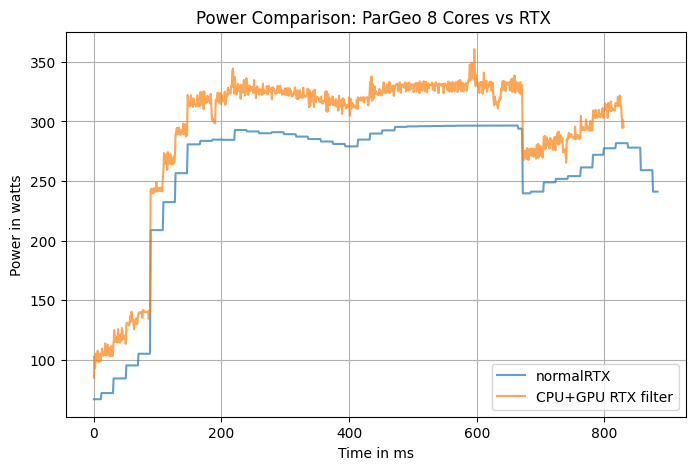

In [86]:
import matplotlib.pyplot as plt

# Convert 'size' to int if needed
#normal8['size'] = normal8['size'].astype(int)
#normalRTX['size'] = normalRTX['size'].astype(int)
#CPU_normalRTX['size'] = CPU_normalRTX['size'].astype(int)
total_normalRTX = normalRTX + CPU_normalRTX

plt.figure(figsize=(8, 5))
#plt.plot(normal8['power'].values, label='ParGeo 8 cores', alpha=0.7)
#plt.plot(normal20['power'].values, label='ParGeo 20 cores', alpha=0.7)
plt.plot(normalRTX['power'].values, label='normalRTX', alpha=0.7)
#plt.plot(CPU_normalRTX['power'].values, label='CPU_normalRTX', alpha=0.7)
plt.plot(total_normalRTX['power'].values, label='CPU+GPU RTX filter', alpha=0.7)
plt.ylabel('Power in watts')
plt.xlabel('Time in ms')
plt.title('Power Comparison: ParGeo 8 Cores vs RTX ')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# average power by size
def average_power_by_size(df):
    # Group by 'size' and calculate the mean of 'power'
    avg_power = df.groupby('size')['power'].mean().reset_index()
    return avg_power

normal8_avg = average_power_by_size(normal8)
normal20_avg = average_power_by_size(normal20)
#normalRTX_avg = average_power_by_size(normalRTX)
CPU_normalRTX_avg = average_power_by_size(total_normalRTX)

print (normal8_avg)
print (normal20_avg)
print (CPU_normalRTX_avg)

        size       power
0  134217728  129.410573
        size       power
0  134217728  128.537285
        size      power
0  268435456  292.25616


In [84]:
# sum power by size
def sum_power_by_size(df):
    # Group by 'size' and calculate the sum of 'power'
    sum_power = df.groupby('size')['power'].sum().reset_index()
    return sum_power

normal8_sum = sum_power_by_size(normal8)
normal20_sum = sum_power_by_size(normal20)
#normalRTX_sum = sum_power_by_size(normalRTX)
CPU_normalRTX_sum = sum_power_by_size(total_normalRTX)   

print (normal8_sum)
print (normal20_sum)
print (CPU_normalRTX_sum)

        size         power
0  134217728  1.388834e+06
        size         power
0  134217728  1.375863e+06
        size          power
0  268435456  242864.869007


In [ ]:
import numpy as np

# Divide normalRTX['power'].values en 100 partes iguales
power_values = normalRTX['power'].values
split_power = np.array_split(power_values, 100)

In [96]:
# Calcular el promedio de cada columna en split_power y guardar en una lista
split_power_column_mean = [np.mean(arr) for arr in split_power]
split_power_column_mean

[67.053,
 70.51766666666667,
 72.25,
 79.05166666666666,
 84.493,
 88.131,
 95.407,
 97.58144444444444,
 105.192,
 116.70966666666666,
 208.851,
 208.851,
 229.74255555555555,
 232.354,
 251.23066666666668,
 256.624,
 272.7266666666667,
 280.778,
 282.06866666666673,
 283.682,
 284.03766666666667,
 284.749,
 284.6528888888889,
 284.576,
 288.2422222222222,
 292.825,
 292.419,
 291.607,
 291.27011111111113,
 290.091,
 290.091,
 290.979,
 290.979,
 289.4998888888889,
 289.315,
 287.7407777777778,
 287.291,
 285.91700000000003,
 285.23,
 284.3122222222222,
 283.165,
 282.4886666666667,
 281.136,
 280.6804444444445,
 279.086,
 279.086,
 284.768,
 284.768,
 289.26222222222225,
 289.824,
 291.9076666666667,
 292.503,
 294.12244444444445,
 295.418,
 295.6144444444445,
 295.86,
 295.918,
 296.034,
 296.048,
 296.16,
 296.16,
 296.312,
 296.312,
 296.42577777777774,
 296.44,
 296.4653333333333,
 296.478,
 296.50077777777784,
 296.519,
 296.52211111111114,
 296.526,
 296.53155555555554,
 296.551

In [94]:
# Calcular el promedio de cada elemento en split_power
split_power_mean = [arr.mean() for arr in split_power]
split_power_mean

[67.053,
 70.51766666666667,
 72.25,
 79.05166666666666,
 84.493,
 88.131,
 95.407,
 97.58144444444444,
 105.192,
 116.70966666666666,
 208.851,
 208.851,
 229.74255555555555,
 232.354,
 251.23066666666668,
 256.624,
 272.7266666666667,
 280.778,
 282.06866666666673,
 283.682,
 284.03766666666667,
 284.749,
 284.6528888888889,
 284.576,
 288.2422222222222,
 292.825,
 292.419,
 291.607,
 291.27011111111113,
 290.091,
 290.091,
 290.979,
 290.979,
 289.4998888888889,
 289.315,
 287.7407777777778,
 287.291,
 285.91700000000003,
 285.23,
 284.3122222222222,
 283.165,
 282.4886666666667,
 281.136,
 280.6804444444445,
 279.086,
 279.086,
 284.768,
 284.768,
 289.26222222222225,
 289.824,
 291.9076666666667,
 292.503,
 294.12244444444445,
 295.418,
 295.6144444444445,
 295.86,
 295.918,
 296.034,
 296.048,
 296.16,
 296.16,
 296.312,
 296.312,
 296.42577777777774,
 296.44,
 296.4653333333333,
 296.478,
 296.50077777777784,
 296.519,
 296.52211111111114,
 296.526,
 296.53155555555554,
 296.551

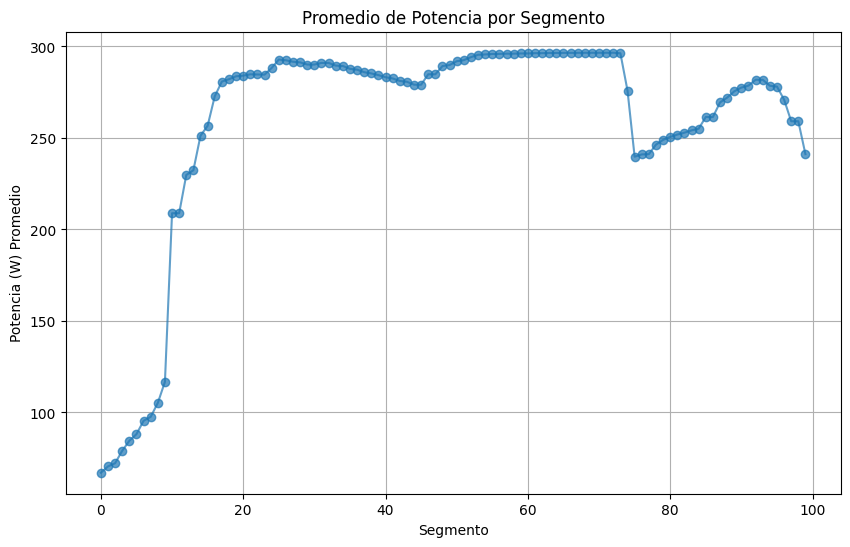

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(split_power_mean, marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Segmento')
plt.ylabel('Potencia (W) Promedio')
plt.title('Promedio de Potencia por Segmento')
plt.grid(True)
plt.show()

In [102]:
normalRTX['power'].values/100

array([0.67053, 0.67053, 0.67053, 0.67053, 0.67053, 0.67053, 0.67053,
       0.67053, 0.67053, 0.67053, 0.67053, 0.67053, 0.7225 , 0.7225 ,
       0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 ,
       0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 , 0.7225 ,
       0.7225 , 0.7225 , 0.7225 , 0.84493, 0.84493, 0.84493, 0.84493,
       0.84493, 0.84493, 0.84493, 0.84493, 0.84493, 0.84493, 0.84493,
       0.84493, 0.84493, 0.84493, 0.84493, 0.84493, 0.84493, 0.84493,
       0.84493, 0.84493, 0.95407, 0.95407, 0.95407, 0.95407, 0.95407,
       0.95407, 0.95407, 0.95407, 0.95407, 0.95407, 0.95407, 0.95407,
       0.95407, 0.95407, 0.95407, 0.95407, 0.95407, 0.95407, 0.95407,
       1.05192, 1.05192, 1.05192, 1.05192, 1.05192, 1.05192, 1.05192,
       1.05192, 1.05192, 1.05192, 1.05192, 1.05192, 1.05192, 1.05192,
       1.05192, 1.05192, 1.05192, 1.05192, 1.05192, 2.08851, 2.08851,
       2.08851, 2.08851, 2.08851, 2.08851, 2.08851, 2.08851, 2.08851,
       2.08851, 2.08

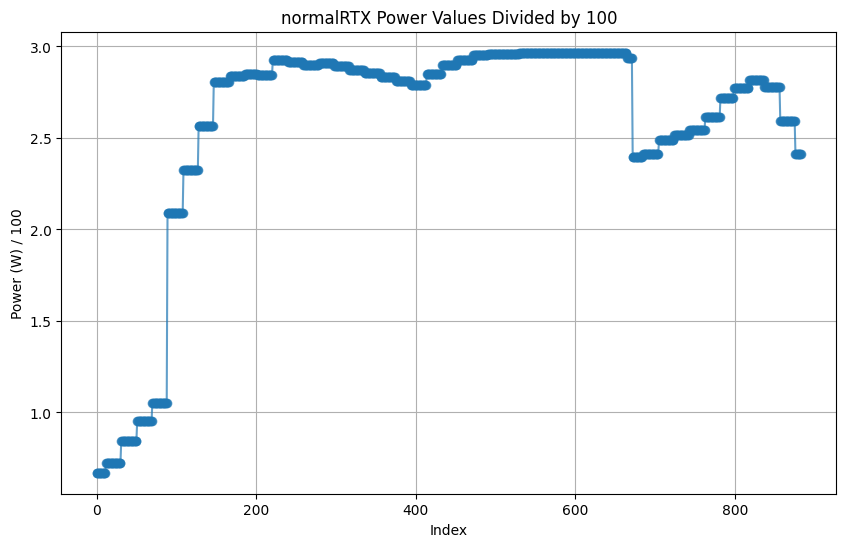

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(normalRTX['power'].values / 100, marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Power (W) / 100')
plt.title('normalRTX Power Values Divided by 100')
plt.grid(True)
plt.show()